In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# This is a data from NPTEL 2025 course, Biological data analysis and visualization with R
df = pd.read_csv('/Users/subasrees/Desktop/Nptel_2/week7/PCA_Cancer_gene_expression_data/100_genes_pca2_new.csv')
df_cancer=pd.DataFrame(df)
print(df_cancer)

       ATP6V1G2  TRIM31  DNAJC18  ZDHHC12     ABI2   MAGI2  NAP1L3   TECTA  \
0        4.5481     0.0   7.7143   9.1315   8.0112  5.8459  2.0701  5.0440   
1        3.8215     0.0   8.4746   7.6489  10.5512  4.4022  0.0000  1.4603   
2        4.6810     0.0   7.8324   7.9329  11.1178  6.6473  2.0568  3.8979   
3        4.6128     0.0   7.8894   9.1572   9.1340  4.3332  2.4088  2.9458   
4        3.5568     0.0   7.2592   8.7778   9.5938  3.9409  1.9529  3.3691   
...         ...     ...      ...      ...      ...     ...     ...     ...   
10098    3.7872     0.0   7.2723   9.8852   9.4818  7.0665  4.6813  5.0150   
10099    6.4766     0.0   8.1048   9.8963   9.9588  7.8004  5.4144  4.6322   
10100    4.9747     0.0   7.2831   8.3701   8.8163  7.9884  4.7192  4.2209   
10101    4.8975     0.0   8.8053   9.1311  10.4827  9.0368  7.6987  5.2877   
10102    5.6647     0.0   6.6179   9.7117   8.8216  7.6672  5.2644  4.1046   

       MUC13  ATP1B2  ...    PAX8   HAUS1   PLCH2   SLC4A2  CAB

In [3]:
labels=pd.read_csv('/Users/subasrees/Desktop/Nptel_2/week7/PCA_Cancer_gene_expression_data/labels.csv')
labels.columns=['Type', 'Abbreviation', 'label']
data=pd.merge(df_cancer,labels,'inner','label')

In [4]:
data.index=data['Abbreviation']
data.drop(['label','Abbreviation','Type'],axis=1,inplace=True)

In [5]:
#scaler = StandardScaler()
#scaled_X = scaler.fit_transform(data)
#print(scaled_X)

In [6]:
scaled_data = preprocessing.scale(data)
print(scaled_data)

[[ 0.00912976 -1.03809947  0.47281647 ... -1.13090114 -0.9953376
   2.33059168]
 [-0.30653687 -1.03809947  1.10229549 ... -0.88341572 -0.96052233
   1.92031469]
 [ 0.0668673  -1.03809947  0.5705956  ... -1.13090114 -0.84923857
   2.77195027]
 ...
 [ 0.19446335 -1.03809947  0.11581087 ... -1.13090114 -1.79379543
  -1.46169244]
 [ 0.16092431 -1.03809947  1.37609361 ... -1.13090114 -1.09761525
  -1.95129626]
 [ 0.49422935 -1.03809947 -0.43493153 ... -0.83571853 -0.50942493
  -1.15467234]]


In [7]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
print(pca_data)

[[ 8.66977932 -8.6475799  -2.05988208 ...  0.92607676 -1.05257108
   1.06953615]
 [ 7.98100704 -8.24420053 -2.5194365  ...  0.01094784  0.15667632
   0.14051566]
 [ 7.01613964 -7.76076975 -2.81013367 ...  0.34614436  0.12191575
   0.77360443]
 ...
 [-3.92351491  3.52677744 -3.6399311  ...  0.35066246 -0.20904004
  -0.37499973]
 [-4.0128794   4.74165197 -5.04146586 ...  0.078224   -0.0628311
   0.21118087]
 [-0.2870348   5.76347192 -1.45980523 ... -0.06244248  0.09310737
  -0.03414355]]


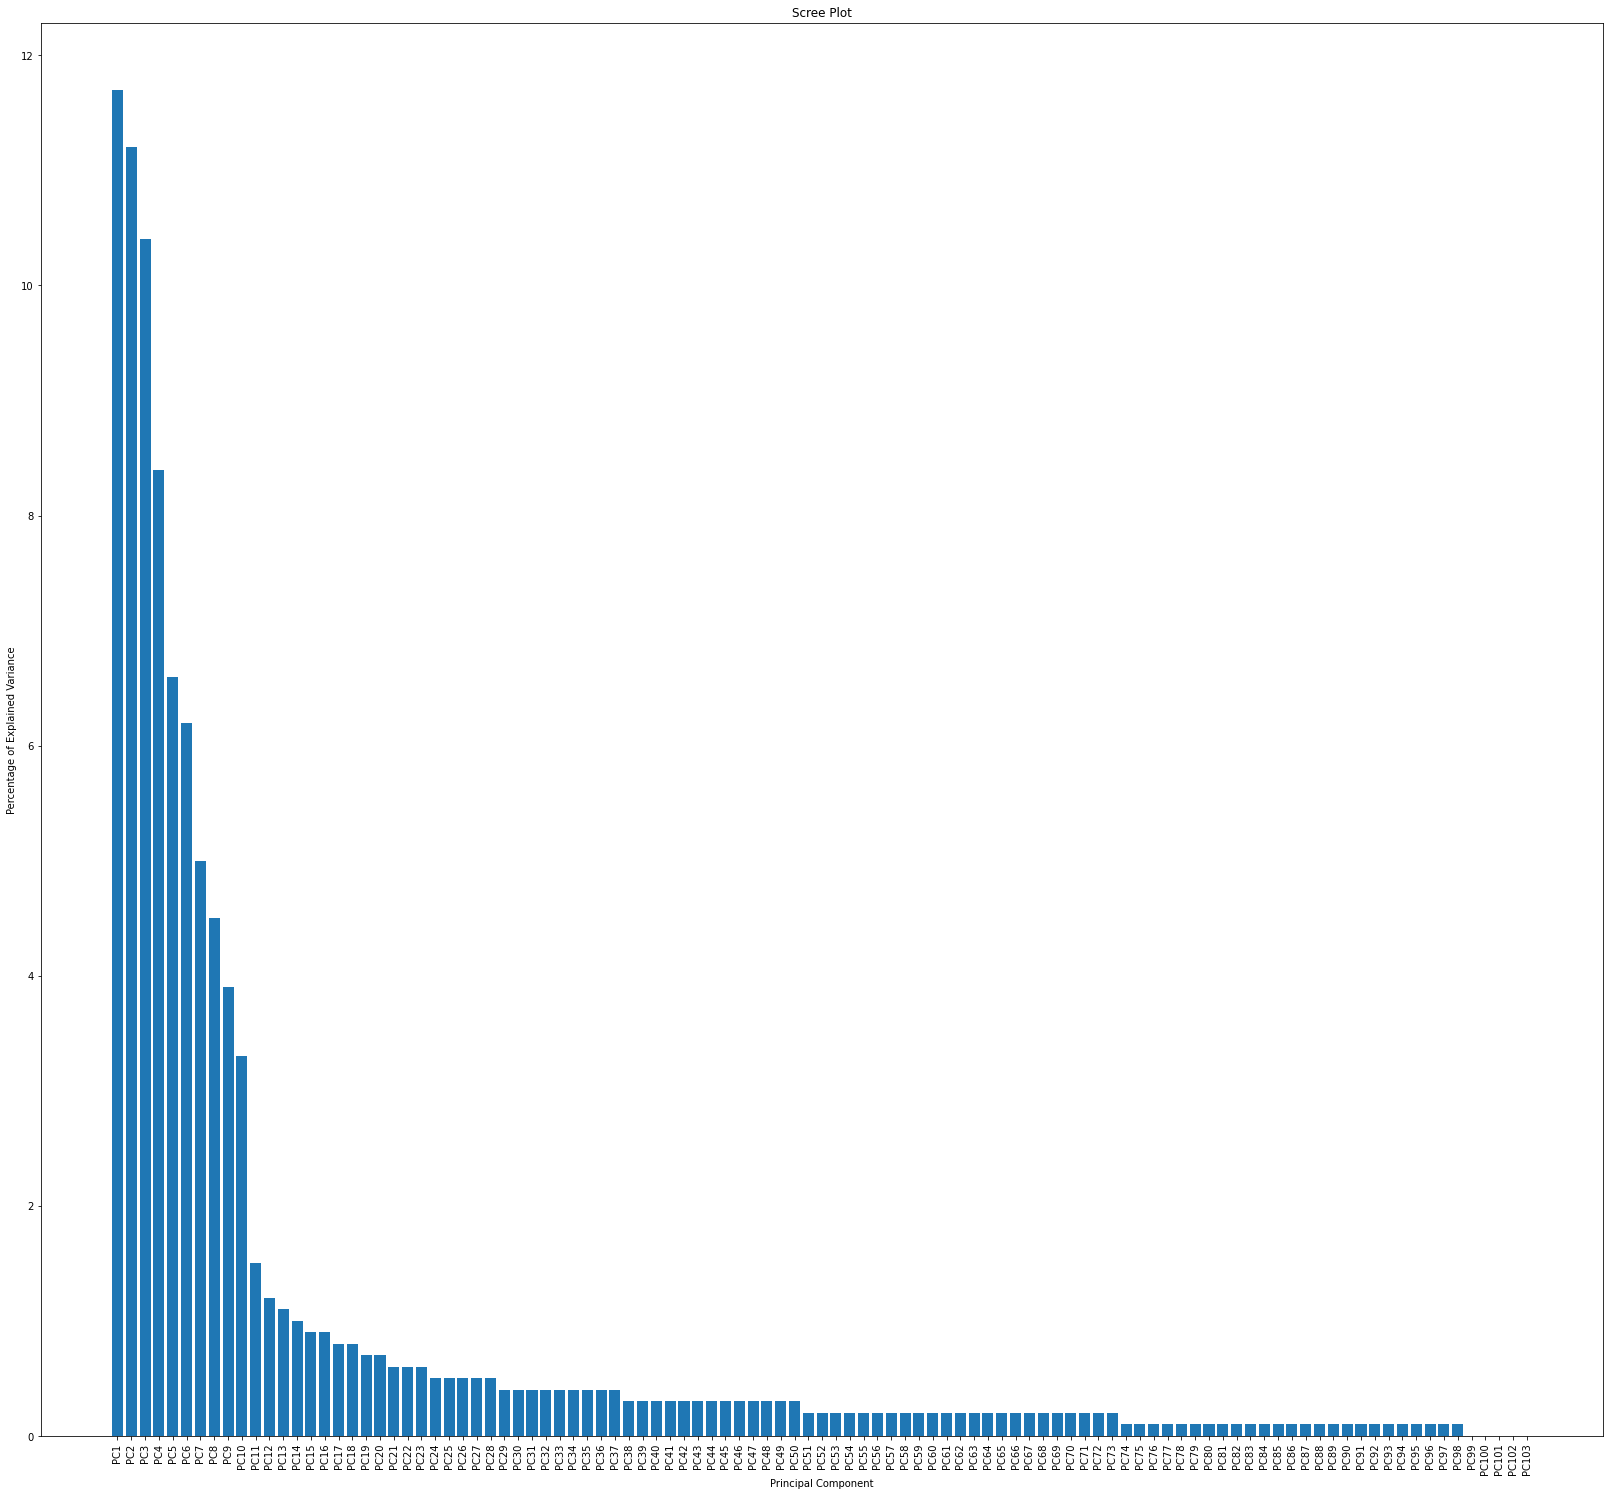

In [8]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(28,26))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=90)
plt.show()

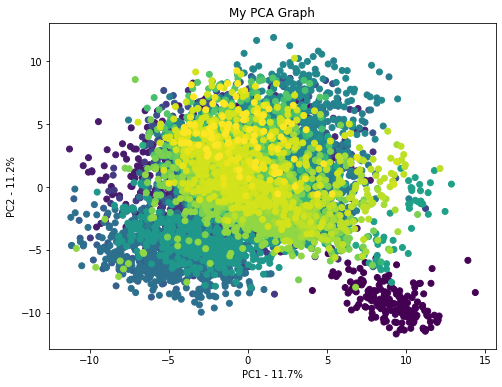

In [34]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=data.index, columns=labels)
plt.figure(figsize=(8,6))
plt.scatter(pca_df.PC1, pca_df.PC2,c=df_cancer['label'])
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [23]:
loading_scores = pd.Series(pca.components_[0], index=data.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_features = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_features])

WAS        0.238266
HCST       0.235524
LST1       0.232316
MYO1F      0.227171
CD37       0.222542
CYTH4      0.219299
SPI1       0.217434
RASAL3     0.215060
ARHGAP9    0.210414
ITGB2      0.208080
dtype: float64
